In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data=r"C:\Users\Apeksha\Downloads\cifar-10-img\cifar-10-img\train"
test_data=r"C:\Users\Apeksha\Downloads\cifar-10-img\cifar-10-img\test"

datagen=ImageDataGenerator(rescale=1./255)

traingen=datagen.flow_from_directory(
    train_data,
    batch_size=128,
    target_size=(32,32),
    class_mode="categorical",
    shuffle=True
)

testgen=datagen.flow_from_directory(
    test_data,
    batch_size=128,
    target_size=(32,32),
    class_mode="categorical",
    shuffle=False
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten , Dropout
from tensorflow.keras.optimizers import SGD

In [ ]:
cnn_model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.3),
    Dense(10,activation="softmax")
])

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(
    optimizer=SGD(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history_cnn=cnn_model.fit(
    traingen,
    validation_data=testgen,
    epochs=5
)

Epoch 1/5
314/314 ━━━━━━━━━━━━━━━━━━━━ 388s 1s/step - accuracy: 0.3736 - loss: 1.7147 - val_accuracy: 0.5022 - val_loss: 1.4081
Epoch 2/5
314/314 ━━━━━━━━━━━━━━━━━━━━ 348s 1s/step - accuracy: 0.5063 - loss: 1.3767 - val_accuracy: 0.5616 - val_loss: 1.2499
Epoch 3/5
314/314 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.5618 - loss: 1.2428 - val_accuracy: 0.5991 - val_loss: 1.1471
Epoch 4/5
314/314 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.5914 - loss: 1.1567 - val_accuracy: 0.6285 - val_loss: 1.0567
Epoch 5/5
314/314 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.6153 - loss: 1.0908 - val_accuracy: 0.6365 - val_loss: 1.0416


In [ ]:
history_cnn=cnn_model.fit(
    traingen,
    validation_data=testgen,
    epochs=5
)

Epoch 1/5
314/314 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.6406 - loss: 1.0256 - val_accuracy: 0.6508 - val_loss: 0.9872
Epoch 2/5
314/314 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.6546 - loss: 0.9870 - val_accuracy: 0.6431 - val_loss: 0.9975
Epoch 3/5
314/314 ━━━━━━━━━━━━━━━━━━━━ 372s 1s/step - accuracy: 0.6695 - loss: 0.9375 - val_accuracy: 0.6672 - val_loss: 0.9399
Epoch 4/5
314/314 ━━━━━━━━━━━━━━━━━━━━ 368s 1s/step - accuracy: 0.6859 - loss: 0.8996 - val_accuracy: 0.6850 - val_loss: 0.9105
Epoch 5/5
314/314 ━━━━━━━━━━━━━━━━━━━━ 403s 1s/step - accuracy: 0.6946 - loss: 0.8679 - val_accuracy: 0.6819 - val_loss: 0.9155


<Axes: >

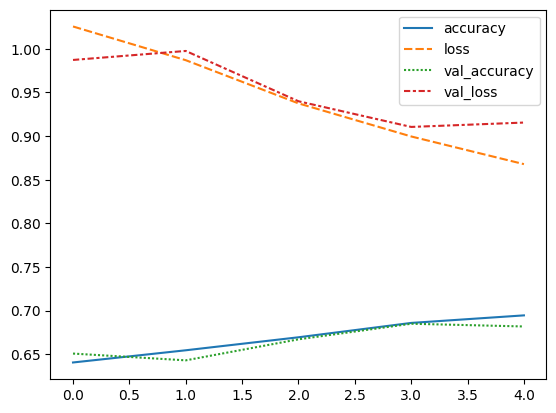

In [ ]:
import seaborn as sns
sns.lineplot(history_cnn.history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


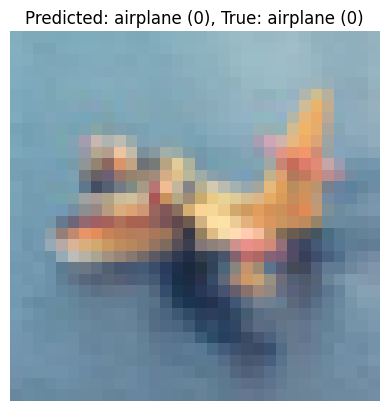

In [ ]:
# --- Predict a single image from the CIFAR-10 test generator ---
import numpy as np
import matplotlib.pyplot as plt

# Get one batch of test images and labels from test generator
x_batch, y_batch = next(testgen)

# Pick one image from the batch (e.g., index 15)
img = x_batch[15]
true_label = np.argmax(y_batch[15])

# Predict the label using your trained CNN model
pred = cnn_model.predict(np.expand_dims(img, axis=0))
predicted_label = np.argmax(pred, axis=1)[0]

# CIFAR-10 class names (optional, for readability)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Show the image and prediction
plt.imshow(img)  # RGB image, no need for cmap
plt.title(f"Predicted: {class_names[predicted_label]} ({predicted_label}), "
          f"True: {class_names[true_label]} ({true_label})")
plt.axis('off')
plt.show()
